# $\Huge \text{Libraries}$

In [315]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import seaborn as sns
import sklearn

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

## $\large \text{plt settings}$

In [316]:
plt.style.use('default')
sns.set(rc={'figure.figsize':(8, 6)})
sns.set_style('white')
sns.despine()

<Figure size 800x600 with 0 Axes>

# $\Huge \text{Data}$

In [317]:
url = 'https://raw.githubusercontent.com/tsebaka/ML-practice/main/Neural%20Networks/data.csv'
data = pd.read_csv(url)

In [318]:
data

,x,y,class
0,3.238258,0.795599,1
1,4.189054,1.631411,-1
2,4.214798,0.019202,1
3,4.432564,0.586037,-1
4,3.503429,0.496178,1
...,...,...,...
2995,4.149008,1.004875,-1
2996,2.632955,0.136764,1
2997,2.805922,1.457728,-1
2998,3.217395,1.425684,1


In [319]:
from sklearn.model_selection import train_test_split

y = data['class']

X = data.drop(columns = 'class')

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

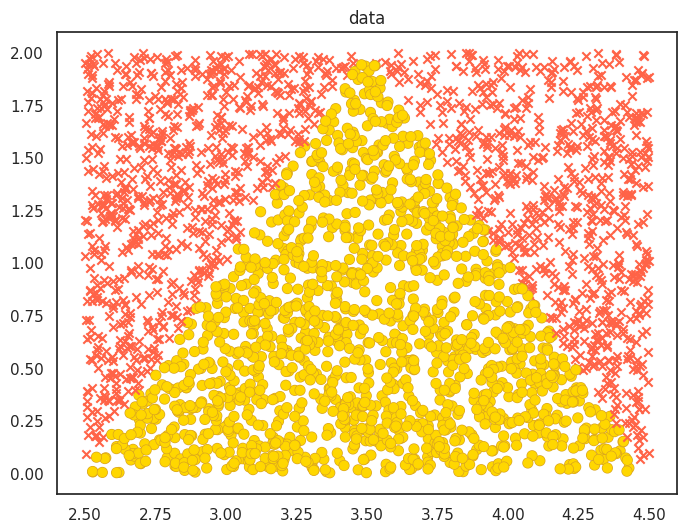

In [320]:
for i in range(len(X_train)):
    if y_train[i] == 1:
        plt.scatter(X_train[i][0], X_train[i][1], color='gold', path_effects=[pe.Stroke(linewidth=2, foreground='goldenrod'), pe.Normal()])
    else:
        plt.scatter(X_train[i][0], X_train[i][1], marker = "x", color='tomato')

for i in range(len(X_test)):
    if y_test[i] == 1:
        plt.scatter(X_test[i][0], X_test[i][1], color='gold', path_effects=[pe.Stroke(linewidth=2, foreground='goldenrod'), pe.Normal()])
    else:
        plt.scatter(X_test[i][0], X_test[i][1], marker = "x", color='tomato')

plt.title('data')
plt.show()

\

$\large \text{Построим нейронную сеть, которая сможет решить эту задачу. Эти два класса, легко можно разделить двумя прямыми,}$$\large\text{знаки точек относительно которых, можно легко расставить:}$

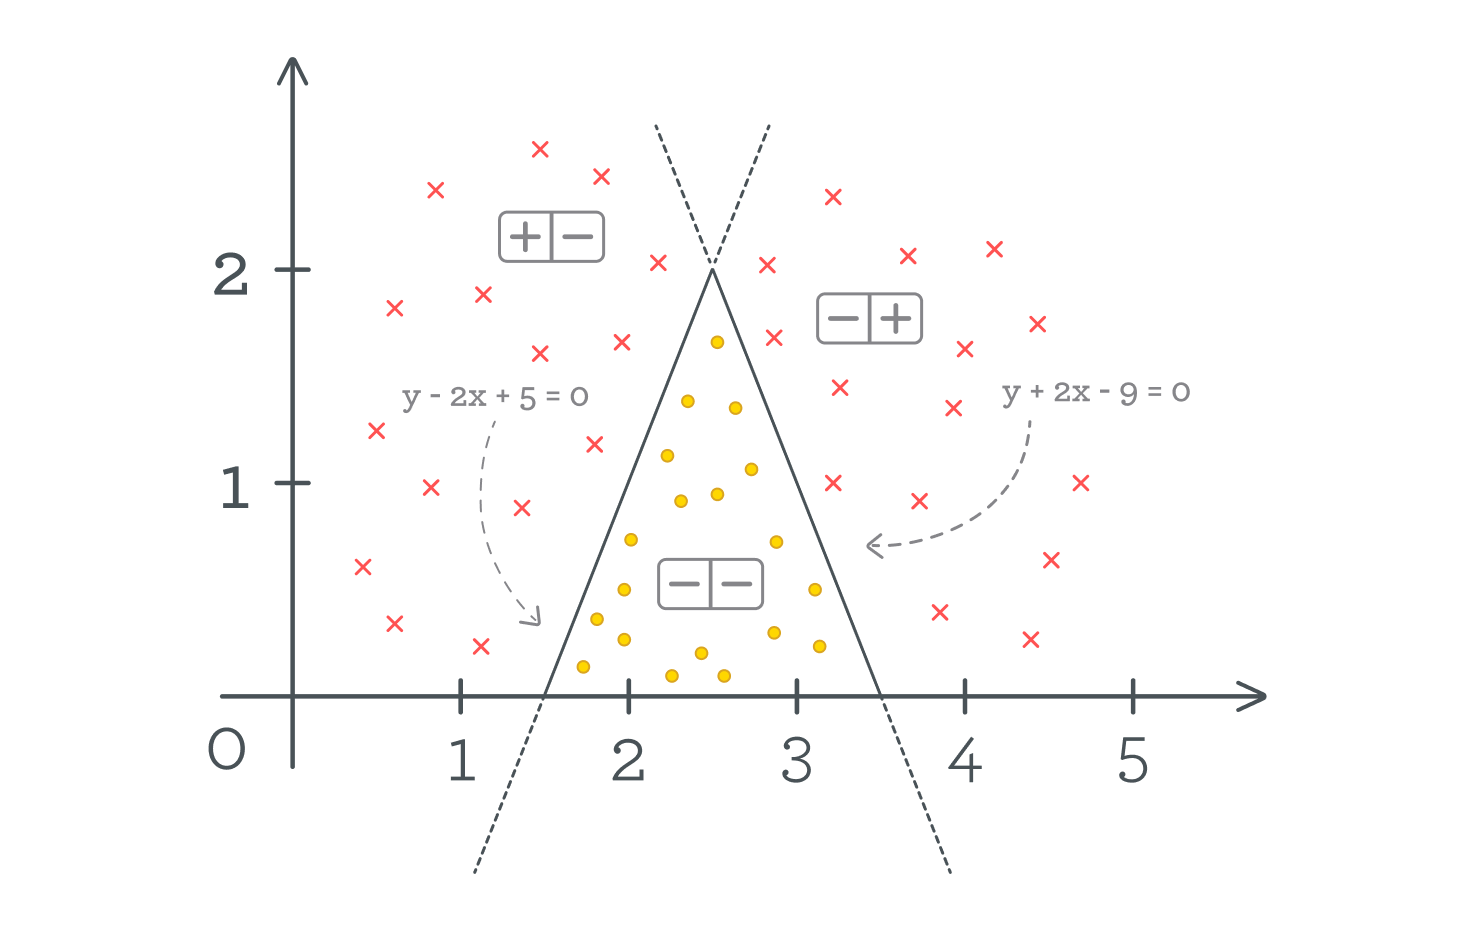
$\text{designed by}$ 
<a href="https://github.com/Dzagcoffee" target="_blank">Dzagcoffee</a>

$\large\text{Тогда, архитектура нашей нейронной сети, будет выглядеть так:}$

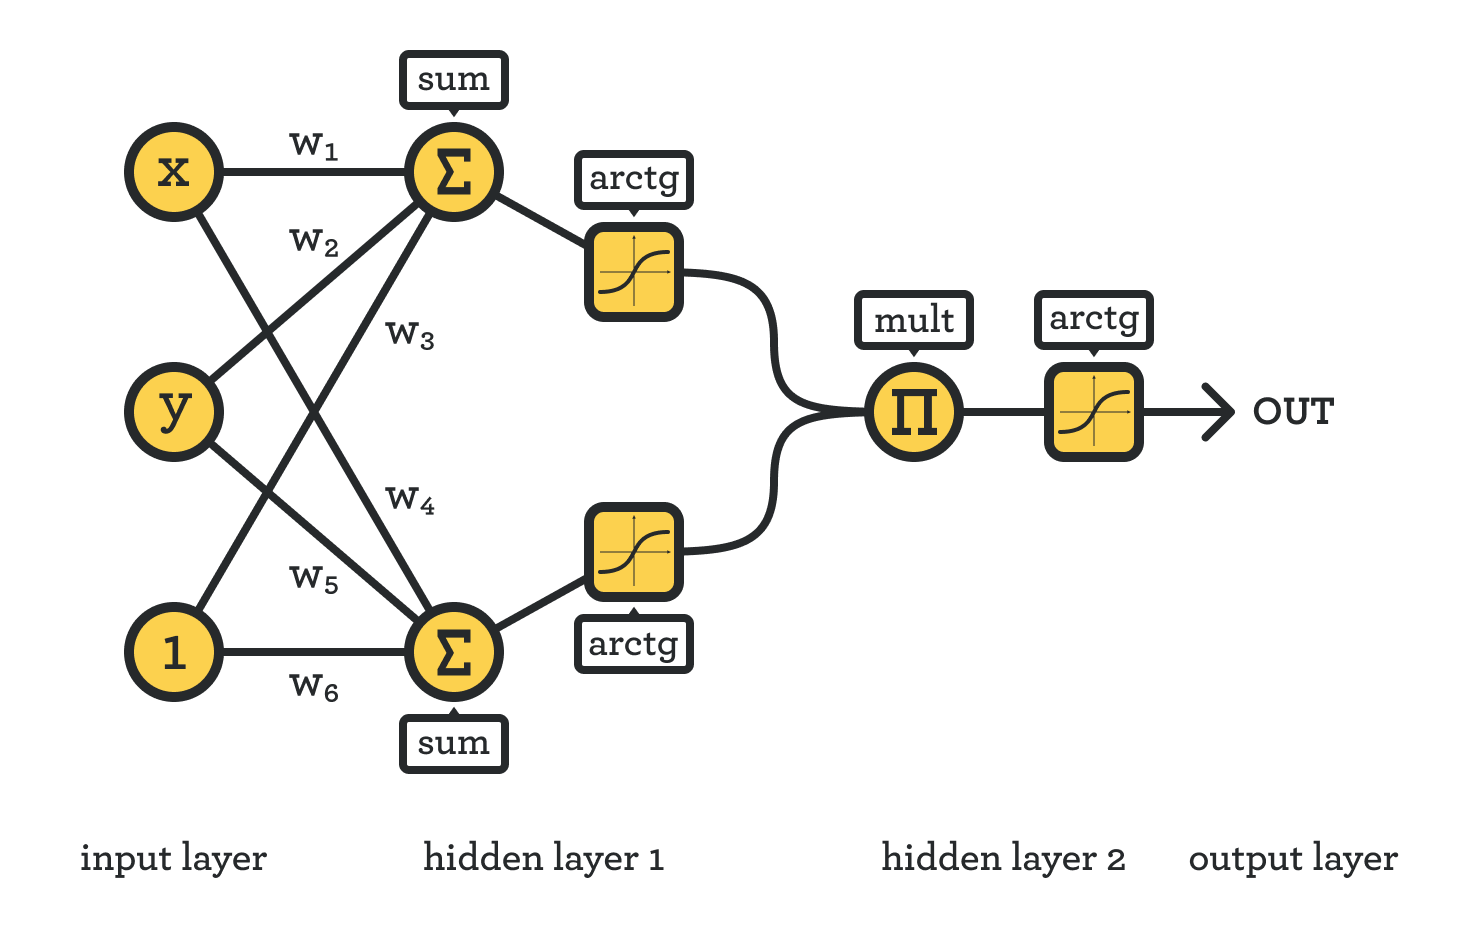
$\text{designed by}$ 
<a href="https://github.com/Dzagcoffee" target="_blank">Dzagcoffee</a>

$\large\text{w1, w2, w3 - это коэфициенты первой прямой, а w4, w5, w6 - второй, которые будут разделять наши точки.}$$\large\text{Тогда, если мы скалярно умножим вектор (x0, y0, 1) на вектор (w1, w2, w3) - то посмотрев на знак этого числа,} $$\large\text{мы узнаем по какую сторону лежит точка с координатами x0, y0 относительно прямой }$ $$w_1 * x + w_2 * y + w_3,$$
$\large\text{аналогично и со второй прямой.}$$\large\text{Тогда возьмём в качетсве функции активации арктангенс, он переведёт любое число в промежуток от -1 до 1(симметричность относительно 0) таким образом,}$$\large\text{чем ближе к нулю наш выход, тем меньше нейронная сеть уверена в классе объекта}$

Теперь подумаем над тем, какую функцию ошибки нам взять. Конечно, можно использовать RMSE, но  

# $\Huge \text{Class Neural Network}$

In [321]:
class NeuralNetwork():
    def __init__(self, iterations=100, learning_rate=0.1,
                 silence='False'):
        
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.silence = silence
        
        self.init_weights()

    def init_weights(self):

        self.w_1 = np.random.uniform(-1, 1)
        self.w_2 = np.random.uniform(-1, 1)
        self.w_3 = np.random.uniform(-1, 1)
        self.w_4 = np.random.uniform(-1, 1)
        self.w_5 = np.random.uniform(-1, 1)
        self.w_6 = np.random.uniform(-1, 1)


    def activation_function(self, x):
        # tanh
        return 2 / (1 + np.exp(-x)) - 1

    def activation_derivative(self, x):
        # tanh derivative
        return (1 + self.activation_function(x)) * (1 - self.activation_function(x)) / 2

    def go_forward(self, x, y):
        
        first_layer_first_neuron = self.w_1 * x + self.w_2 * y + self.w_3
        first_layer_second_neuron = self.w_4 * x + self.w_5 * y + self.w_6

        second_layer_first_neuron = self.activation_function(first_layer_first_neuron)
        second_layer_second_neuron = self.activation_function(first_layer_second_neuron)

        third_layer = second_layer_first_neuron * second_layer_second_neuron

        output = self.activation_function(third_layer)

        return first_layer_first_neuron, first_layer_second_neuron, \
        second_layer_first_neuron, second_layer_second_neuron, \
        third_layer, output

    def computeGradient(self, 
                        first_layer_first_neuron, first_layer_second_neuron,
                        second_layer_first_neuron, second_layer_second_neuron,
                        third_layer, x, y, y_real):
        
        grad = [0, 0, 0, 0, 0, 0]
        grad[0] = - 1 * y_real * self.activation_derivative(third_layer) * \
         self.activation_function(first_layer_second_neuron) * self.activation_derivative(first_layer_first_neuron) * x
        grad[1] = - 1 * y_real * self.activation_derivative(third_layer) * \
         self.activation_function(first_layer_second_neuron) * self.activation_derivative(first_layer_first_neuron) * y
        grad[2] = - 1 * y_real * self.activation_derivative(third_layer) * \
         self.activation_function(first_layer_second_neuron) * self.activation_derivative(first_layer_first_neuron) * 1 
        grad[3] = - 1 * y_real * self.activation_derivative(third_layer) * \
         self.activation_function(first_layer_first_neuron) * self.activation_derivative(first_layer_second_neuron) * x 
        grad[4] = - 1 * y_real * self.activation_derivative(third_layer) * \
         self.activation_function(first_layer_first_neuron) * self.activation_derivative(first_layer_second_neuron) * y
        grad[5] = - 1 * y_real * self.activation_derivative(third_layer) * \
         self.activation_function(first_layer_first_neuron) * self.activation_derivative(first_layer_second_neuron) * 1
        
        return grad

    def fit(self, X_train, y_train, silence):
        
        for i in range(self.iterations):
            for j in range(len(X_train)):
                y_real = y_train[j]

                first_layer_first_neuron, first_layer_second_neuron, \
                second_layer_first_neuron, second_layer_second_neuron, \
                third_layer, output = self.go_forward(X_train[j][0], X_train[j][1])
                loss = max(0, - output * y_real)
                
                if loss != 0:
                    grad = self.computeGradient(first_layer_first_neuron, first_layer_second_neuron,
                        second_layer_first_neuron, second_layer_second_neuron,
                        third_layer, X_train[j][0], X_train[j][1], y_real)
                    
                    self.w_1 -= self.learning_rate * grad[0]
                    self.w_2 -= self.learning_rate * grad[1]
                    self.w_3 -= self.learning_rate * grad[2]
                    self.w_4 -= self.learning_rate * grad[3]
                    self.w_5 -= self.learning_rate * grad[4]
                    self.w_6 -= self.learning_rate * grad[5]
            
            if silence=='True' and i % 50 == 0:
                self.verbose(X_train)

    def verbose(self, X_train):
            y_pred = []
            for k in range(len(X_train)):
                y_pred.append(nn.predict([X_train[k][0], X_train[k][1]]))
                if y_pred[k] > 0:
                    y_pred[k] = 1
                else:
                    y_pred[k] = -1
            print('epoch:', i, ' ', 'accuracy:', accuracy_score(y_train, y_pred))

    def predict(self, x):

        _, _, _, _, _, prediction = self.go_forward(x[0], x[1])
        return prediction

# **Fitting and predictions**

In [322]:
nn = NeuralNetwork(iterations=300, learning_rate=0.1)
nn.fit(X_train, y_train, silence='True')

epoch: 899   accuracy: 0.6190476190476191
epoch: 899   accuracy: 0.9842857142857143
epoch: 899   accuracy: 0.9028571428571428
epoch: 899   accuracy: 0.9914285714285714
epoch: 899   accuracy: 0.9047619047619048
epoch: 899   accuracy: 0.9052380952380953


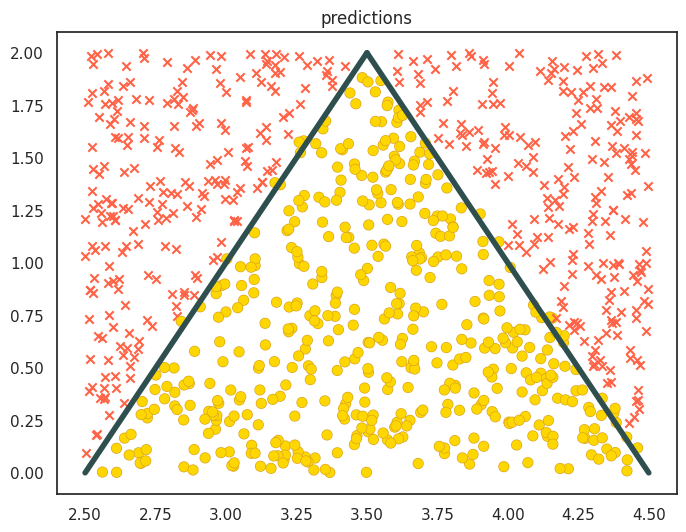

In [323]:
plt.plot([2.5, 3.5], [0, 2], color='darkslategray', linewidth=4)
plt.plot([4.5, 3.5], [0, 2], color='darkslategray', linewidth=4)

for i in range(900):

    pred = nn.predict(X_test[i])

    if pred > 0:
        plt.scatter(X_test[i][0], X_test[i][1], color='gold', path_effects=[pe.Stroke(linewidth=2, foreground='goldenrod'), pe.Normal()])
    else:
        plt.scatter(X_test[i][0], X_test[i][1], marker = "x", color='tomato')

plt.title('predictions')
plt.show()